In [1]:
import re
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns

sys.path.insert(0, '../')

from src import GlobularCluster
from src.plot import LogNorm, AsinhNorm
from src.utils import profile_binning, clip_quantile_nd
from src.cluster import DBSCAN_Clustering

%load_ext autoreload
%autoreload 2

## Example 1 :Tuc 47

In [5]:
drct = r"../data/"
gc_name = "NGC_104_47Tuc"

GC = GlobularCluster.from_directory(gc_name, drct)
GC.table.to_pandas().describe()

,x,y,pmx,pmy,pmx_e,pmy_e,pm_corr,g_mag,bp_rp,filter,memberprob,r,pm
count,23712.000000,23712.000000,23712.000000,23712.000000,23712.000000,23712.000000,23712.000000,23712.000000,23712.000000,23712.0,23712.000000,23712.000000,23712.000000
mean,-0.004448,-0.000191,5.272766,-2.524013,0.307152,0.244210,-0.105172,17.797122,0.908284,1.0,0.979514,0.270936,5.860957
std,0.207279,0.210570,0.480847,0.430948,0.259012,0.208588,0.120552,1.504480,0.165473,0.0,0.030510,0.117962,0.488676
min,-0.653854,-0.660985,1.174167,-10.613130,0.023578,0.020528,-0.872892,10.600150,-0.504303,1.0,0.800808,0.011847,2.962313
25%,-0.159198,-0.156311,4.973129,-2.784171,0.157174,0.128521,-0.180709,17.291620,0.795353,1.0,0.978603,0.185482,5.565006
50%,-0.003916,-0.003666,5.260023,-2.520517,0.244489,0.195748,-0.098047,18.026770,0.855639,1.0,0.991288,0.255338,5.844789
75%,0.150654,0.154814,5.549738,-2.255227,0.385157,0.303747,-0.029092,18.727695,0.990236,1.0,0.995704,0.340190,6.132028
max,0.651429,0.652909,13.090510,1.719343,4.337127,4.168120,0.810983,20.995840,3.651908,1.0,0.998725,0.666440,16.852299


Text(0,0.5,'Y')

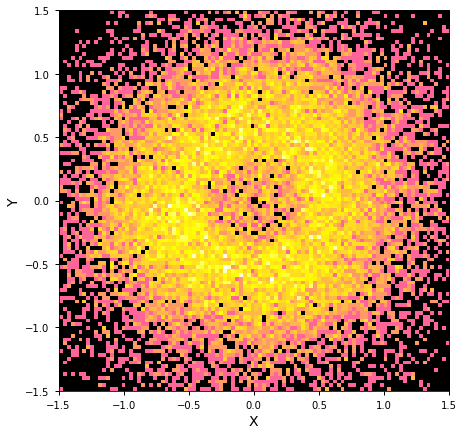

In [6]:
plt.figure(figsize=(7,7))
H, xb, yb, _ = plt.hist2d(GC.x, GC.y, bins=100, range=[[-1.5,1.5],[-1.5,1.5]], norm=LogNorm(), cmap="gnuplot2")
plt.xlabel("X")
plt.ylabel("Y")

Text(0.5,0,'R')

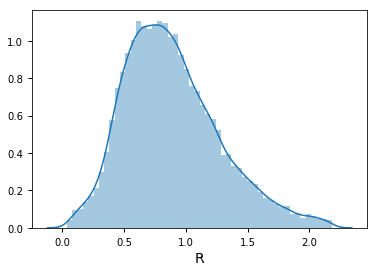

In [7]:
sns.distplot(GC.r)
plt.xlabel("R")

Text(0,0.5,'PMY')

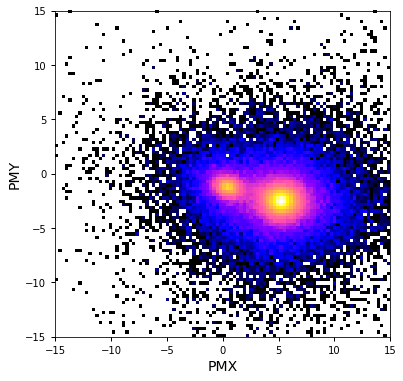

In [13]:
from matplotlib import colors
plt.figure(figsize=(6,6))
H, xb, yb, _ = plt.hist2d(GC.table_full["pmx"].value, GC.table_full["pmy"].value, bins=100, range=[[-15,15],[-15,15]], norm=colors.LogNorm(), cmap="gnuplot2")
plt.xlabel("PMX")
plt.ylabel("PMY")

Text(0,0.5,'PM')

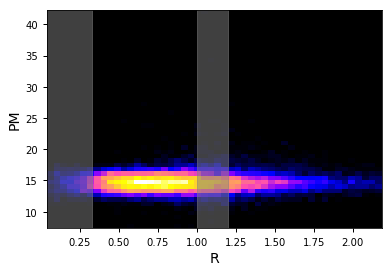

In [15]:
H, xb, yb, _ = plt.hist2d(GC.r, GC.pm, bins=50, norm=AsinhNorm(), cmap="gnuplot2")

plt.axvspan(0, 0.33, 0, color="gray", alpha=0.5)
plt.axvspan(1, 1.2, 0, color="gray", alpha=0.5)
plt.xlabel("R") # normalized
plt.ylabel("PM")

In [25]:
X0 = np.vstack([GC.table_full['r'].value / GC.summary['rscale'].value,
                GC.table_full['pmx'].value, GC.table_full['pmy'].value]).T
good_pm = clip_quantile_nd(X0, z_quantile=[0.001, 0.999], ind_clip=[1,2])

X = X0[good_pm]

In [26]:
clus = DBSCAN_Clustering(X)
clus.run_clustering(plot=False)          # if use DBSCAN : eps = 0.5

Clustering using HDBSCAN
Clustering Finished: 2 components


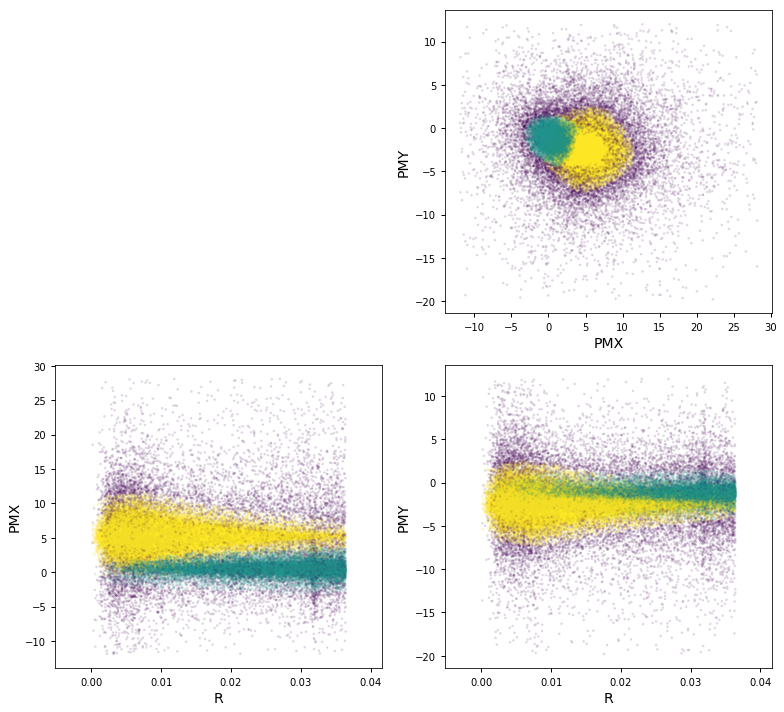

In [27]:
clus.plot_clustering()

In [28]:
is_mp = clus.predict_main_pop()

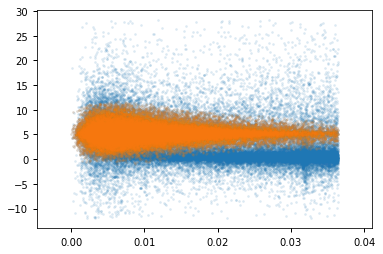

In [29]:
plt.scatter(X[:,0], X[:,1], s=3, alpha=0.1)
plt.scatter(X[is_mp][:,0], X[is_mp][:,1], s=3, alpha=0.1)

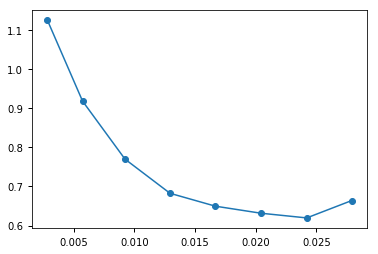

In [37]:
from astropy.stats import mad_std

bins=np.linspace(0.0, 0.03, 9)
r_rbin, z_rbin, z_bins = profile_binning(X[is_mp][:,0], X[is_mp][:,1], bins=bins, plot=False)
plt.plot(r_rbin, [mad_std(z_bins[i]['pm']) for i in range(len(z_bins))],'o-')

# plt.plot(GC.r, sigmar_2(GC.r, 1e6, 24, 0))
# sigmar_2(GC.r, 1e6, 24, 0).to_value('km**2/s**2') / (4.5*u.kpc * np.tan(0.399) / u.yr).to_value('km/s')**2

## Example 2 : M22

In [ ]:
drct = r"../scripts/get_globular_clusters/"
gc_name = "NGC_6656_M_22"

GC = GlobularCluster.from_directory(gc_name, drct)
GC.df.to_pandas().describe()

In [ ]:
plt.figure(figsize=(7,7))
H, xb, yb, _ = plt.hist2d(GC.x, GC.y, bins=100, range=[[-1.5,1.5],[-1.5,1.5]], norm=LogNorm(), cmap="gnuplot2")
plt.xlabel("X")
plt.ylabel("Y")

In [ ]:
plt.figure(figsize=(6,6))
H, xb, yb, _ = plt.hist2d(GC.df["pmx"], GC.df["pmy"], bins=100, range=[[-15,15],[-20,10]], norm=LogNorm(), cmap="gnuplot2")
plt.xlabel("PMX")
plt.ylabel("PMY")

In [ ]:
H, xb, yb, _ = plt.hist2d(GC.r, GC.pm, bins=50, range=[[0,1.2],[0,20]], norm=AsinhNorm(), cmap="gnuplot2")

plt.axvspan(0, 0.33, 0, color="gray", alpha=0.5)
plt.axvspan(1, 1.2, 0, color="gray", alpha=0.5)
plt.xlabel("R") # normalized
plt.ylabel("PM")

In [ ]:
X0 = np.vstack([GC.r, GC.pmx, GC.pmy]).T
good_pm = clip_quantile_nd(X0, z_quantile=[0.001, 0.999], ind_clip=[1,2])

X = X0[good_pm]

In [ ]:
clus = DBSCAN_Clustering(X)
clus.run_clustering(plot=False)          # if use DBSCAN : eps = 0.3

In [ ]:
clus.plot_clustering()

In [ ]:
is_mp = clus.predict_main_pop()

plt.scatter(X[:,0], X[:,1], s=3, alpha=0.1)
plt.scatter(X[is_mp][:,0], X[is_mp][:,1], s=3, alpha=0.1)

In [ ]:
r_rbin, z_rbin, z_bins = profile_binning(GC.r, GC.pm, bins=bins, plot=False)
plt.plot(r_rbin, [mad_std(z_bins[i]['pm']) for i in range(len(z_bins))],'o-')


## Example 2 : M71

In [ ]:
drct = r"../scripts/get_globular_clusters/"
gc_name = "NGC_6838_M_71"

GC = GlobularCluster.from_directory(gc_name, drct)
GC.df.to_pandas().describe()

In [ ]:
plt.figure(figsize=(7,7))
H, xb, yb, _ = plt.hist2d(GC.x, GC.y, bins=100, range=[[-1.5,1.5],[-1.5,1.5]], norm=LogNorm(), cmap="gnuplot2")
plt.xlabel("X")
plt.ylabel("Y")

In [ ]:
plt.figure(figsize=(6,6))
H, xb, yb, _ = plt.hist2d(GC.df["pmx"], GC.df["pmy"], bins=100, range=[[-15,15],[-20,10]], norm=LogNorm(), cmap="gnuplot2")
plt.xlabel("PMX")
plt.ylabel("PMY")

In [ ]:
H, xb, yb, _ = plt.hist2d(GC.r, GC.pm, bins=50, range=[[0,1.2],[0,12]], norm=AsinhNorm(), cmap="gnuplot2")

plt.axvspan(0, 0.33, 0, color="gray", alpha=0.5)
plt.axvspan(1, 1.2, 0, color="gray", alpha=0.5)
plt.xlabel("R") # normalized
plt.ylabel("PM")

In [ ]:
X0 = np.vstack([GC.r, GC.pmx, GC.pmy]).T
good_pm = clip_quantile_nd(X0, z_quantile=[0.001, 0.999], ind_clip=[1,2])

X = X0[good_pm]

In [ ]:
clus = DBSCAN_Clustering(X)
clus.run_clustering(plot=False)          # DBSCAN : eps = 0.3

In [ ]:
clus.plot_clustering()

In [ ]:
is_mp = clus.predict_main_pop()

plt.scatter(X[:,0], X[:,1], s=3, alpha=0.1)
plt.scatter(X[is_mp][:,0], X[is_mp][:,1], s=3, alpha=0.1)